# Loading libraries and dataset

In [2]:
# Import necessary libraries for data analysis, visualization, and model training

# Core data manipulation libraries
import pandas as pd  # For data handling and manipulation
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots

# Machine Learning and NLP Libraries
import torch  # For deep learning computations
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments  # Hugging Face tools

# Scikit-learn for data splitting and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Visualization Tools
from wordcloud import WordCloud  # For generating word clouds

# Text Preprocessing Libraries
import re  # Regular expressions for text cleaning
from nltk.corpus import stopwords  # Stopwords for removing common words
from nltk.stem import WordNetLemmatizer  # Lemmatizer for word normalization
from textblob import TextBlob  # For sentiment polarity analysis



In [3]:
# Load the AMAZON Poduct review dataset with cust_feedback, ratings and sentilabels
df = pd.read_csv('/content/Amazon-Product-Reviews - Amazon Product Review (1).csv')

In [4]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1.0
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0.0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1.0
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1.0
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1.0


# Checking null values

In [5]:
#This command provides a count of null or missing values for each column
df.isnull().sum()

,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,0
helpful_votes,0
total_votes,0


# Drop missing values


In [6]:
# Remove rows with missing values from the DataFrame to ensure a clean dataset
df = df.dropna()

In [7]:
# Display the dimensions of the DataFrame (number of rows and columns)
df.shape

(23662, 16)

# Data transformation

In [8]:
# Convert sentiment to int
df['sentiment'] = df['sentiment'].astype(int)

<ipython-input-8-56d028eaa775>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].astype(int)


In [9]:
 #Convert the 'star_rating' column to numeric format, coercing invalid entries to NaN
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')

<ipython-input-9-5a5870620df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# function designed to clean and prepare text data for analysis

In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_amazon_reviews(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords, lemmatize words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply the text preprocessing
df['review_body'] = df['review_body'].apply(clean_amazon_reviews)


# Feature Engineering: Create a feature for length of review

In [13]:
# Create a new column 'review_length' that stores the word count of each review in 'review_body'
df['review_length'] = df['review_body'].apply(lambda x: len(x.split()))

In [14]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,review_length
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,great love,2015-08-31,1,2
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,lot adsbr slow processing speedbr occasionally...,2015-08-31,0,16
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,excellent unit versatility tablet besides comp...,2015-08-31,1,66
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,bought amazon prime ended buying gb one camera...,2015-08-31,1,96
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,amazon product continue meet expectation,2015-08-31,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23662,US,5433004,R112NQ11LKTMBH,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,Y,Three Stars,lack expandable memory sufficient internal mem...,2015-01-04,0,20
23663,US,46564832,R2I03W265V7B8J,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,Five Stars,love,2015-01-04,1,1
23664,US,15320773,RM0SOEHDBOLPP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,love kindle use lot away home,2015-01-04,1,6
23665,US,15669290,R2QPSTMV70F7N2,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,"Lots of cool features, I am just used to my IO...",lot cool feature used io system itll take litt...,2015-01-04,1,14


#Distribution of Star Ratings

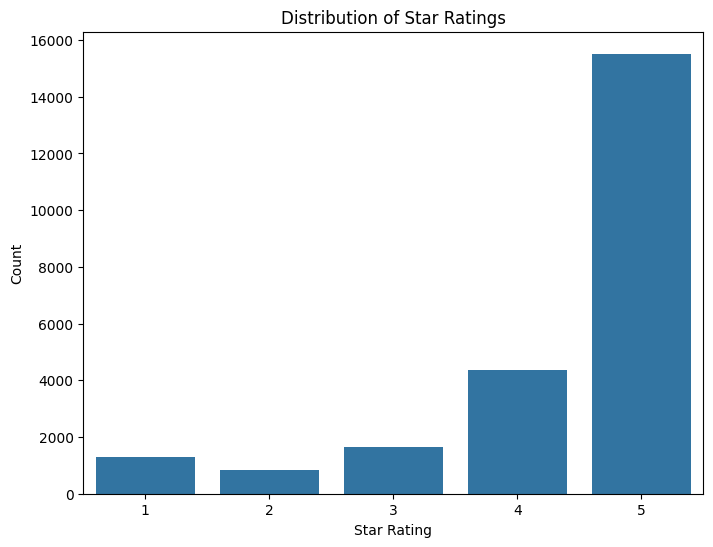

In [15]:
# Calculate the count of each unique star rating and sort them in ascending order
star_counts = df['star_rating'].value_counts().sort_index()

# Create a bar plot to visualize the distribution of star ratings
plt.figure(figsize=(8, 6))
sns.barplot(x=star_counts.index, y=star_counts.values) # Plot the star ratings and their counts
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

# Distribution of Sentiments in dataset

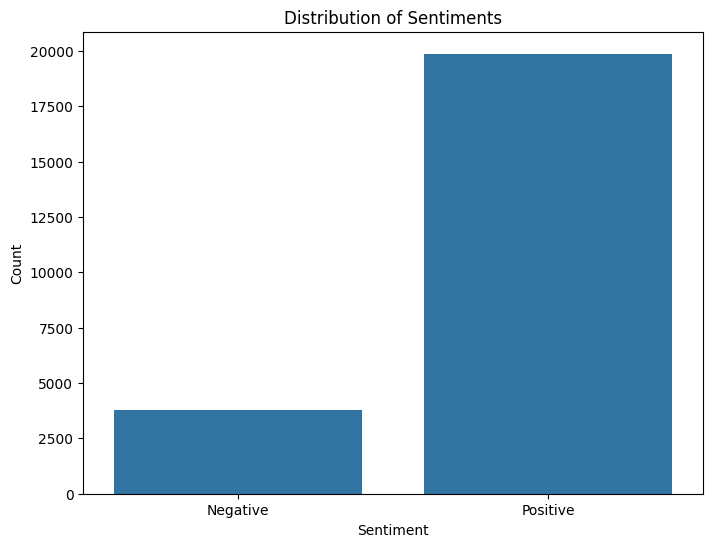

In [16]:
# Plot the distribution using value_counts and barplot
sentiment_counts = df['sentiment'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values) # Plot the sentiment counts
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Number of Reviews Over Time

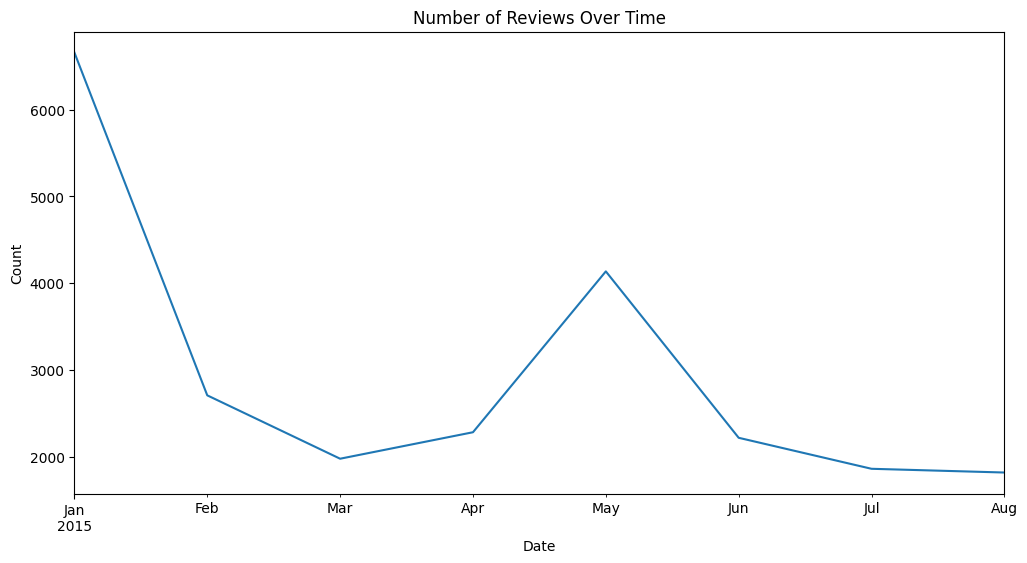

In [17]:
# Properly format and convert the review_date column into a datetime format
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d', errors='coerce')
reviews_over_time = df['review_date'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line')  # Specify the plot type
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# star ratings by verified purchase status

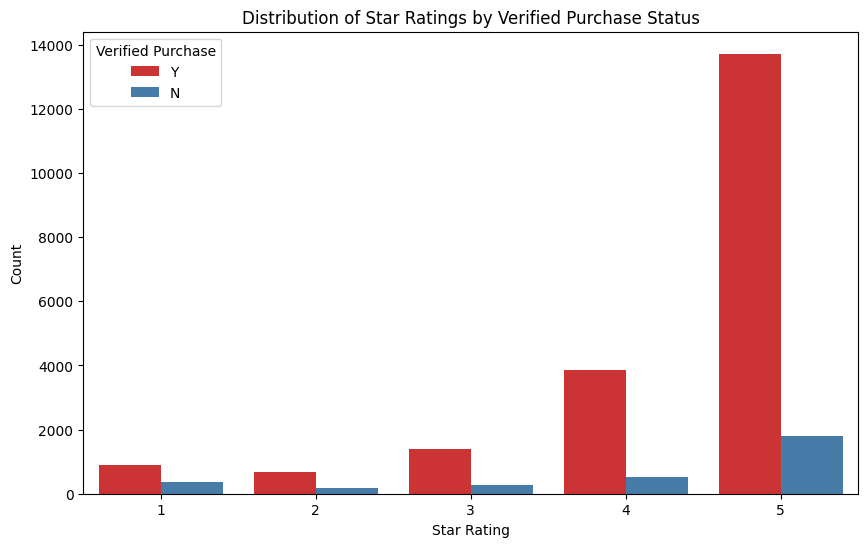

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for star ratings by verified purchase status
plt.figure(figsize=(10, 6))
sns.countplot(x='star_rating', hue='verified_purchase', data=df, palette='Set1')
plt.title('Distribution of Star Ratings by Verified Purchase Status')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Verified Purchase')
plt.show()


# Distribution of Review Lengths for Positive and Negative Sentiments

<ipython-input-19-e590d381d037>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment',y='review_length', data=df, palette='Set2')


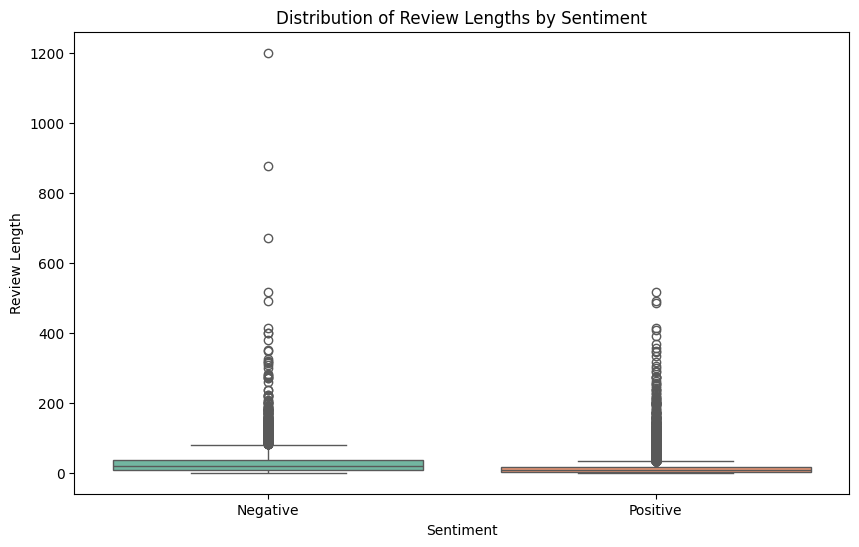

In [19]:
# Distribution of Review Lengths by Sentiment
plt.figure(figsize=(10, 6))
# Create a box plot showing review lengths for each sentiment category
sns.boxplot(x='sentiment',y='review_length', data=df, palette='Set2')
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


# Average Review Length per Sentiment


<ipython-input-20-9430175959e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_review_length_sentiment.index, y=avg_review_length_sentiment.values, palette='Set2')


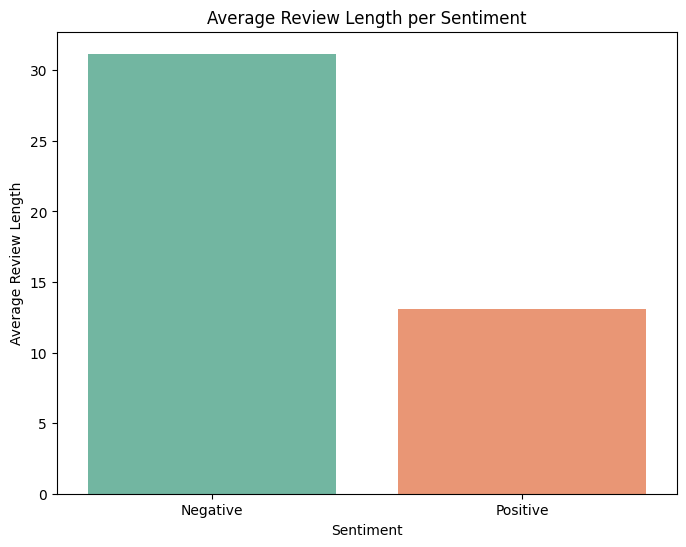

In [20]:
# Calculates average review length for each sentiment category using 'sentiment' column and gives the mean of 'review_length'
avg_review_length_sentiment = df.groupby('sentiment')['review_length'].mean()

# Create a bar plot to visualize average review length in every sentiment category
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_review_length_sentiment.index, y=avg_review_length_sentiment.values, palette='Set2')
plt.title('Average Review Length per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=10)
plt.show()

# average rating per month

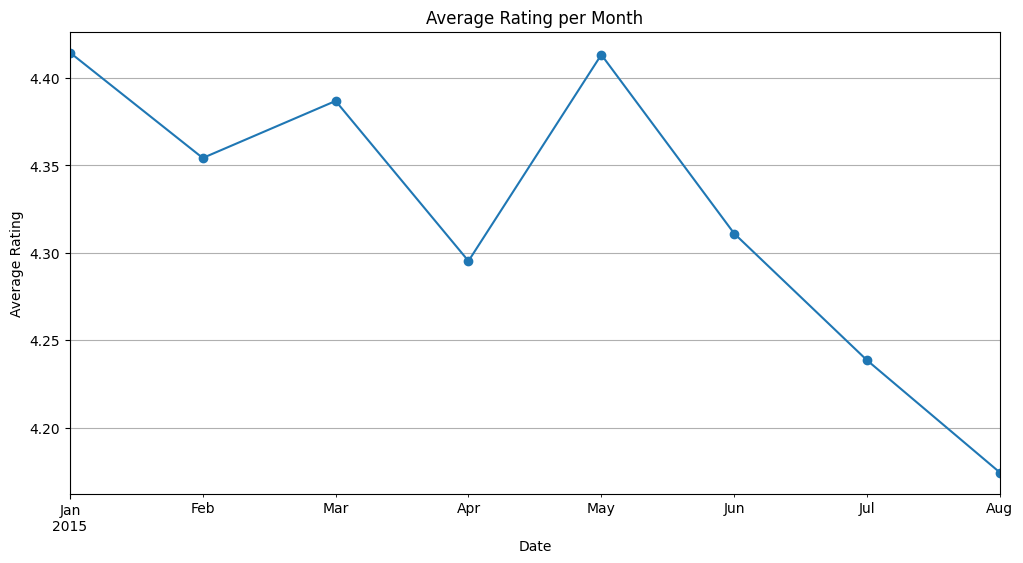

In [21]:
# Calculate average rating per month
monthly_avg_rating = df.groupby(df['review_date'].dt.to_period('M'))['star_rating'].mean()

# Plot average rating per month
plt.figure(figsize=(12, 6))
monthly_avg_rating.plot(kind='line', marker='o')
plt.title('Average Rating per Month')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# Top 10 Most Common Review Headlines

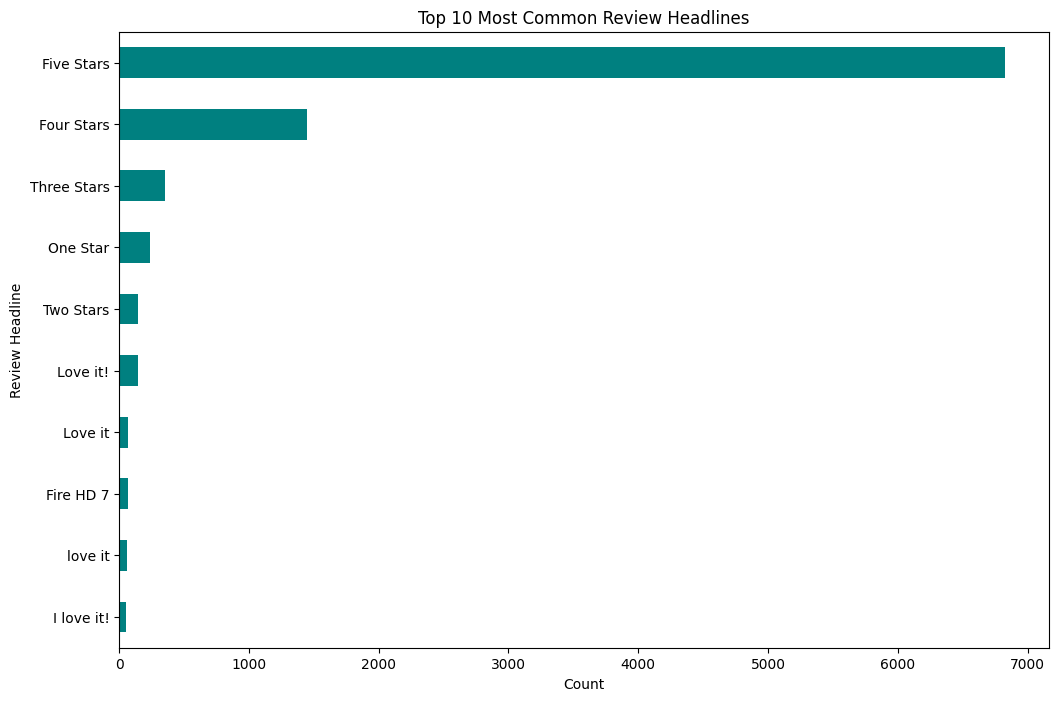

In [22]:
# Get the top 10 most common review headlines
top_headlines = df['review_headline'].value_counts().head(10)

# Plot the top 10 most common review headlines
plt.figure(figsize=(12, 8))
top_headlines.plot(kind='barh', color='teal')
plt.title('Top 10 Most Common Review Headlines')
plt.xlabel('Count')
plt.ylabel('Review Headline')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


# Train-test split

In [23]:
train_texts, val_texts, train_labels, val_labels = train_test_split(df['review_body'].tolist(), df['sentiment'].tolist(), test_size=0.2)

# Tokenizing

In [24]:
# Loading the tokenizer
tokenizer = AutoTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')

# Tokenize the data
max_length = 64
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

# Data set class

In [25]:
# Create a dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


# Loading model

In [26]:
# Load the pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D', num_labels=2) #for binary classification

# Define the training arguments and hyperparameters to configure the model for traininig process
training_args = TrainingArguments(
    output_dir='./results', #it's a directory which saves training results
    num_train_epochs=2,
    per_device_train_batch_size=4, #training batch size
    per_device_eval_batch_size=4, #evaluation batch size
    gradient_accumulation_steps=2,
    fp16=True, #mixed precison training
    warmup_steps=200,
    weight_decay=0.01, # to prevent overfitting
    logging_dir='./logs', #it's a directory whhich saves the training logs for monitoring
    logging_steps=50,
    evaluation_strategy="epoch",
    report_to=None  # Disable W&B logging
)



pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [27]:
# Define the evaluation metric

def compute_metrics(pred):
    labels = pred.label_ids #extracting true labels from pred object
    preds = pred.predictions.argmax(-1) #extracting the predicted labels by finding the index of max value
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)  #calculating overall accuracy of predictions
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision, #measure the % of correct positive predictions
        'recall': recall #measure how many actual postives were correctly identified
    }

# Model Training

In [28]:
# Initialize the Trainer
trainer = Trainer(
    model=model, #pre trained model TinyBERT being fine tuned
    args=training_args, #hyper parameters defined in earlier step
    train_dataset=train_dataset, #dataset for training
    eval_dataset=val_dataset, #dataset for evaluating model during training
    compute_metrics=compute_metrics
)
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
0,0.294500,0.292213,0.907881,0.946106,0.929560,0.963252
1,0.260600,0.312987,0.909571,0.946911,0.933480,0.960735


TrainOutput(global_step=4732, training_loss=0.2967991295852403, metrics={'train_runtime': 3643.7672, 'train_samples_per_second': 10.39, 'train_steps_per_second': 1.299, 'total_flos': 67846753008384.0, 'train_loss': 0.2967991295852403, 'epoch': 1.999577435030636})

# Model Accuracy

In [29]:
# Evaluate the model
results = trainer.evaluate()

print(f"BERT Model Accuracy: {results['eval_accuracy']}")
print(f"F1 Score: {results['eval_f1']}")
print(f"Precision: {results['eval_precision']}")
print(f"Recall: {results['eval_recall']}")

BERT Model Accuracy: 0.9095710965560955
F1 Score: 0.9469114363681469
Precision: 0.9334800684764001
Recall: 0.96073496098666


# Loss and Accuracy Curves

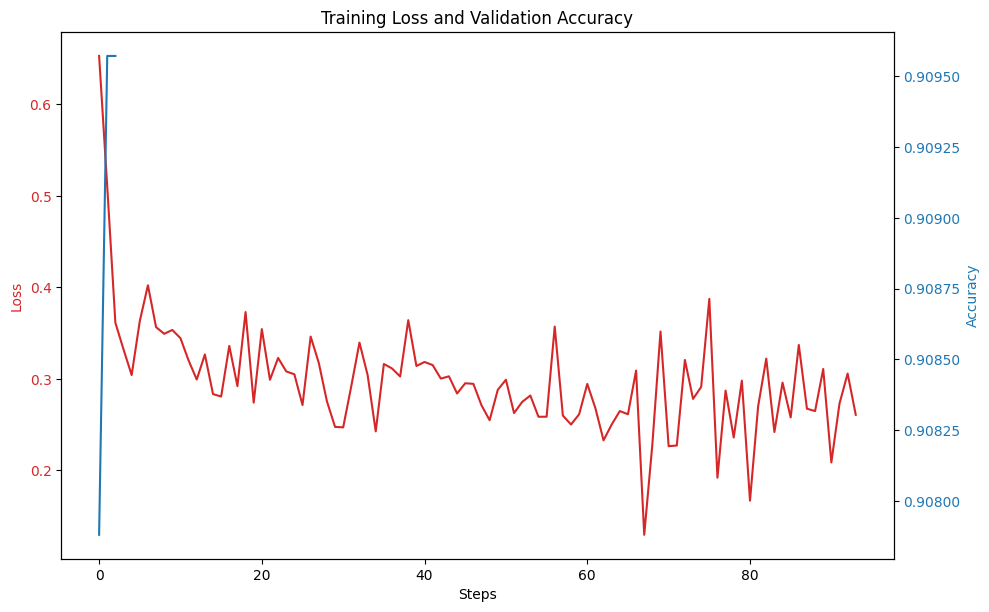

In [30]:
# Access the training logs
log_history = trainer.state.log_history

# Extract loss and accuracy values from the logs
train_loss = [log['loss'] for log in log_history if 'loss' in log]
eval_accuracy = [log['eval_accuracy'] for log in log_history if 'eval_accuracy' in log]

# Plot Training Loss and Evaluation Accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(len(train_loss)), train_loss, color='tab:red', label='Training Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(range(len(eval_accuracy)), eval_accuracy, color='tab:blue', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # To ensure that the labels don't overlap
plt.title('Training Loss and Validation Accuracy')
plt.show()

# Confusion Matrix

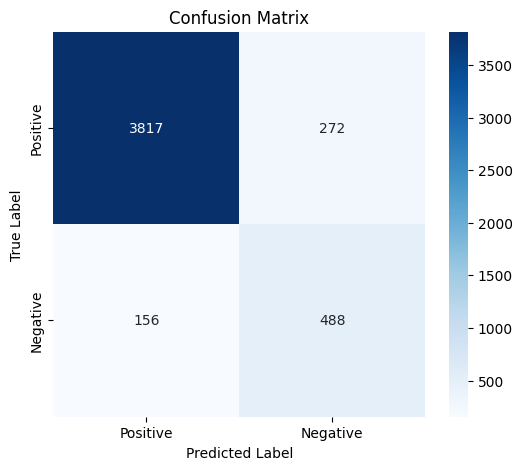

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Get predictions
preds = trainer.predict(val_dataset)
pred_labels = preds.predictions.argmax(-1)
true_labels = preds.label_ids

# Generate confusion matrix
cm = confusion_matrix(  true_labels, pred_labels)
cm = np.array([[cm[1, 1], cm[0, 1]],  # True Positive (top-left), False Positive (top-right)
               [cm[1, 0], cm[0, 0]]])  # False Negative (bottom-left), True Negative (bottom-right)

# Extract TP, FP, FN, TN
tp, fp, fn, tn = cm.ravel()

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive',  'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve

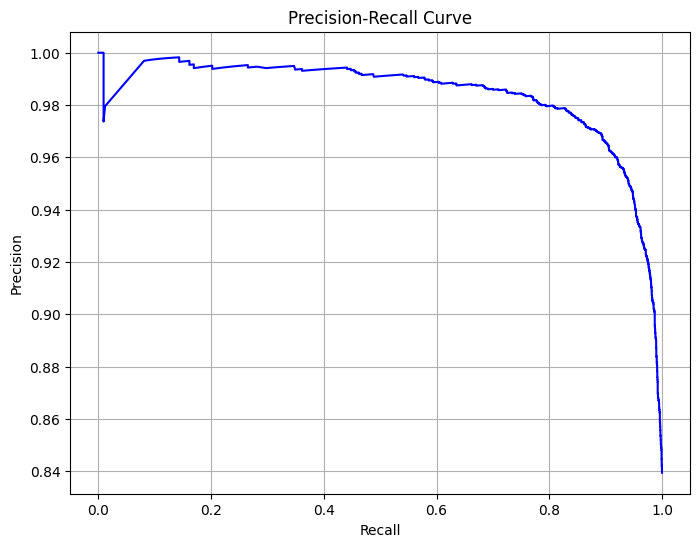

In [32]:
from sklearn.metrics import precision_recall_curve
# Get precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(true_labels, preds.predictions[:, 1]) #true lables are actual lable for binary classification and
#`preds.predictions[:, 1]` extracts the predicted probabilities for positive class

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b') #b indicates blue line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True) #enables grid lines in graph for readability
plt.show()

In [33]:
# Clustering with K-Means

## K-Means Clustering

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
#initializing tfidf vectorizer
vectorizer = TfidfVectorizer(max_features=5000) #limits the vocab to top 5000 most important terms based on tfidf score
X = vectorizer.fit_transform(df['review_body']).toarray() # Fit the vectorizer on the review texts and transform them into a TF-IDF matrix

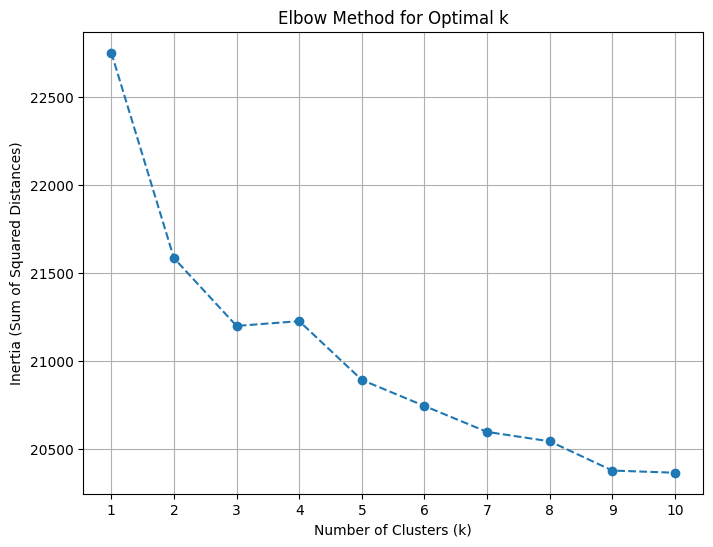

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of clusters to test
k_range = range(1, 11)  # Testing for 1 to 10 clusters
inertia_values = []  # To store the inertia (sum of squared distances)

# Perform K-Means for each k and store the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is the TF-IDF matrix
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


<ipython-input-44-0f928e7e89d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='Set2')


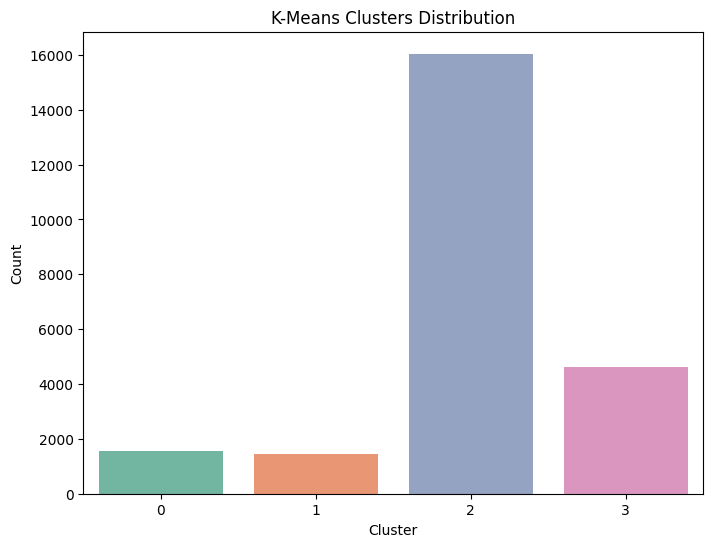

In [44]:
from sklearn.cluster import KMeans
# Applying K-Means clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42) #specify 4 clusters
kmeans_labels = kmeans.fit_predict(X) #Fits the K-Means model to the data and predicts the cluster for each sample.

# Adding clustering labels as a new column in DataFrame
df['cluster'] = kmeans_labels

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title('K-Means Clusters Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Analyze the clusters and their characteristics

In [45]:
#group the dataframe by cluster labels and calculate summary stats
cluster_summary = df.groupby('cluster').agg({
    'star_rating': 'mean', #calculate avg star rating for each cluster
    'sentiment': 'mean', #calculate avg senti score
    'review_body': 'count' #count no. of reviews in each cluster
}).reset_index()

print(cluster_summary) #print the summary stats

   cluster  star_rating  sentiment  review_body
0        0     4.560881   0.908031         1544
1        1     4.907958   0.993772         1445
2        2     4.142501   0.780077        16042
3        3     4.832002   0.977111         4631


# Clusters in 2D Using PCA

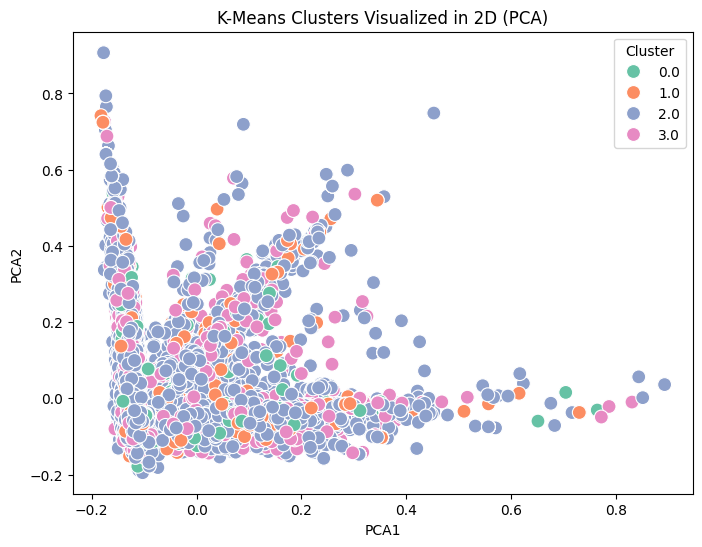

In [46]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the feature space to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']  # Add cluster labels

# Plot the clusters in 2D using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='Set2', s=100, marker='o')
plt.title('K-Means Clusters Visualized in 2D (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


# Cluster Profiling

In [47]:
# Create a profiling DataFrame for each cluster
cluster_profile = df.groupby('cluster').agg({
    'star_rating': ['mean', 'std'],
    'sentiment': lambda x: (x > 0.5).mean(),  # Percentage of positive sentiment (assuming > 0.5 is positive)
    'review_body': 'count'
}).reset_index()

# Flatten multi-index columns
cluster_profile.columns = ['_'.join(col).strip() for col in cluster_profile.columns.values]
cluster_profile


,cluster_,star_rating_mean,star_rating_std,sentiment_<lambda>,review_body_count
0,0,4.560881,0.870142,0.908031,1544
1,1,4.907958,0.374719,0.993772,1445
2,2,4.142501,1.228372,0.780077,16042
3,3,4.832002,0.539037,0.977111,4631
